In [39]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
import wandb
from wandb.keras import WandbCallback
from tensorflow.keras.optimizers import Adam
from keras.callbacks import optimizer

In [28]:
!pip install -q wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 205.1/205.1 kB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.8 MB/s eta 0:00:00


In [30]:
!wandb login

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [ ]:
learning_rate_a = 0.01
epochs_a = 500
batch_size_a = 64

wandb.init(project="Tarea_RN_ej1")#nombre del projecto
wandb.config.learning_rate = learning_rate_a
wandb.config.epochs = epochs_a
wandb.config.batch_size = batch_size_a

wandb: ERROR Control-C detected -- Run data was not synced


In [102]:
# Función a) 3sin(pix)
x_train_a = np.linspace(-1, 1, 1000)
y_train_a = 3 * np.sin(np.pi * x_train_a)


In [103]:
# Definir modelo
model_a = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(1,)),
    layers.Dense(1)
])

In [104]:
# Compilar modelo
model_a.compile(loss='mse', optimizer= Adam(learning_rate=learning_rate_a))

# Entrenar modelo
history = model_a.fit(x_train_a, y_train_a,
                    batch_size=batch_size_a,
                    epochs=epochs_a,
                    verbose=1,
                    callbacks=[WandbCallback()])

Epoch 1/500
16/16 [==============================] - 1s 3ms/step - loss: 2.2221
Epoch 2/500
16/16 [==============================] - 0s 2ms/step - loss: 1.4398
Epoch 3/500
16/16 [==============================] - 0s 2ms/step - loss: 1.3394
Epoch 4/500
16/16 [==============================] - 0s 2ms/step - loss: 1.3306
Epoch 5/500
16/16 [==============================] - 0s 2ms/step - loss: 1.3433
Epoch 6/500
16/16 [==============================] - 0s 3ms/step - loss: 1.3408
Epoch 7/500
16/16 [==============================] - 0s 2ms/step - loss: 1.3258
Epoch 8/500
16/16 [==============================] - 0s 3ms/step - loss: 1.3422
Epoch 9/500
16/16 [==============================] - 0s 3ms/step - loss: 1.3269
Epoch 10/500
16/16 [==============================] - 0s 2ms/step - loss: 1.3389
Epoch 11/500
16/16 [==============================] - 0s 2ms/step - loss: 1.3592
Epoch 12/500
16/16 [==============================] - 0s 3ms/step - loss: 1.3426
Epoch 13/500
16/16 [=================

In [94]:
model_a.summary()#informacion de la red

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 128)               256       
                                                                 
 dense_27 (Dense)            (None, 1)                 129       
                                                                 
Total params: 385
Trainable params: 385
Non-trainable params: 0
_________________________________________________________________


In [95]:
# Evaluar modelo
x_test_a = np.linspace(-1, 1, 10)
y_test_a = 3 * np.sin(np.pi * x_test_a)
loss_a = model_a.evaluate(x_test_a, y_test_a, verbose=1)

1/1 [==============================] - 0s 35ms/step - loss: 0.0138


1/1 [==============================] - 0s 47ms/step


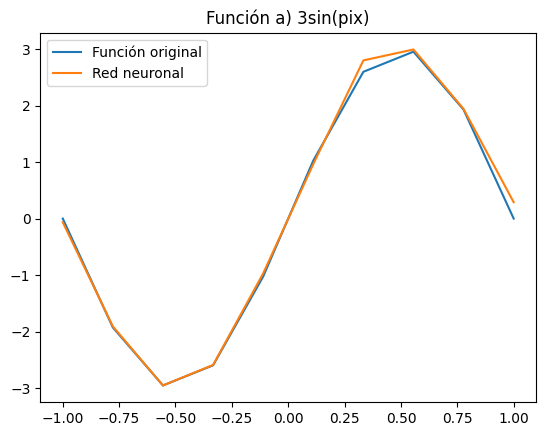

In [96]:
# Graficar función original y solución de la red
plt.plot(x_test_a, y_test_a, label='Función original')
plt.plot(x_test_a, model_a.predict(x_test_a), label='Red neuronal')
plt.legend()
plt.title('Función a) 3sin(pix)')
plt.show()

In [97]:
learning_rate_b = 0.01
epochs_b = 500
batch_size_b = 64

wandb.init(project="Tarea_RN_ej1")#nombre del projecto
wandb.config.learning_rate = learning_rate_b
wandb.config.epochs = epochs_b
wandb.config.batch_size = batch_size_b

epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_epoch,492
best_val_loss,2e-05
epoch,499
loss,3e-05
val_loss,2e-05


In [89]:
# Función b) 1+2x+4x^3
x_train_b = np.linspace(-1, 1, 1000)
y_train_b = 1 + 2 * x_train_b + 4 * x_train_b**3


In [90]:
# Definir modelo
model_b = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(1,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

In [93]:
# Compilar modelo
model_b.compile(loss='mse', optimizer='adam')

# Entrenar modelo
history_b = model_b.fit(x_train_b, y_train_b,
                    batch_size=64,
                    epochs=500,
                    verbose=1,
                    validation_data=(x_test_b, y_test_b),
                    callbacks=[WandbCallback()])

Epoch 1/500
 1/16 [>.............................] - ETA: 11s - loss: 6.8426

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 2s 73ms/step - loss: 7.1074 - val_loss: 9.4995
Epoch 2/500
 1/16 [>.............................] - ETA: 0s - loss: 5.1524

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 73ms/step - loss: 5.8727 - val_loss: 7.7001
Epoch 3/500
 1/16 [>.............................] - ETA: 0s - loss: 5.6139

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 61ms/step - loss: 4.3816 - val_loss: 5.4213
Epoch 4/500
 1/16 [>.............................] - ETA: 0s - loss: 2.3162

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 62ms/step - loss: 2.6102 - val_loss: 3.1030
Epoch 5/500
 1/16 [>.............................] - ETA: 0s - loss: 2.2606

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 66ms/step - loss: 1.2188 - val_loss: 1.5925
Epoch 6/500
 1/16 [>.............................] - ETA: 0s - loss: 0.9175

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 62ms/step - loss: 0.7253 - val_loss: 1.1806
Epoch 7/500
13/16 [=======================>......] - ETA: 0s - loss: 0.6608

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 93ms/step - loss: 0.6559 - val_loss: 1.1407
Epoch 8/500
13/16 [=======================>......] - ETA: 0s - loss: 0.6057

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 97ms/step - loss: 0.6016 - val_loss: 1.0791
Epoch 9/500
 1/16 [>.............................] - ETA: 0s - loss: 0.4977

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 61ms/step - loss: 0.5591 - val_loss: 1.0116
Epoch 10/500
 1/16 [>.............................] - ETA: 0s - loss: 0.4992

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 66ms/step - loss: 0.5086 - val_loss: 0.9342
Epoch 11/500
 1/16 [>.............................] - ETA: 0s - loss: 0.4352

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 62ms/step - loss: 0.4555 - val_loss: 0.8434
Epoch 12/500
 6/16 [==========>...................] - ETA: 0s - loss: 0.3729

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 64ms/step - loss: 0.4038 - val_loss: 0.7638
Epoch 13/500
 1/16 [>.............................] - ETA: 0s - loss: 0.4210

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 2s 99ms/step - loss: 0.3532 - val_loss: 0.6794
Epoch 14/500
 1/16 [>.............................] - ETA: 0s - loss: 0.2137

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 65ms/step - loss: 0.3100 - val_loss: 0.6057
Epoch 15/500
 1/16 [>.............................] - ETA: 0s - loss: 0.2382

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 63ms/step - loss: 0.2663 - val_loss: 0.5364
Epoch 16/500
 1/16 [>.............................] - ETA: 0s - loss: 0.2197

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 65ms/step - loss: 0.2294 - val_loss: 0.4688
Epoch 17/500
 1/16 [>.............................] - ETA: 0s - loss: 0.1940

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 62ms/step - loss: 0.1936 - val_loss: 0.4208
Epoch 18/500
 1/16 [>.............................] - ETA: 0s - loss: 0.2398

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 74ms/step - loss: 0.1675 - val_loss: 0.3605
Epoch 19/500
16/16 [==============================] - ETA: 0s - loss: 0.1445

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 91ms/step - loss: 0.1445 - val_loss: 0.3168
Epoch 20/500
14/16 [=========================>....] - ETA: 0s - loss: 0.1275

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 88ms/step - loss: 0.1254 - val_loss: 0.2798
Epoch 21/500
 1/16 [>.............................] - ETA: 0s - loss: 0.0982

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 63ms/step - loss: 0.1096 - val_loss: 0.2501
Epoch 22/500
 1/16 [>.............................] - ETA: 0s - loss: 0.1183

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 63ms/step - loss: 0.0969 - val_loss: 0.2225
Epoch 23/500
 1/16 [>.............................] - ETA: 0s - loss: 0.0597

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 62ms/step - loss: 0.0854 - val_loss: 0.2008
Epoch 24/500
 1/16 [>.............................] - ETA: 0s - loss: 0.0686

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 61ms/step - loss: 0.0759 - val_loss: 0.1841
Epoch 25/500
 1/16 [>.............................] - ETA: 0s - loss: 0.0539

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 64ms/step - loss: 0.0661 - val_loss: 0.1671
Epoch 26/500
 1/16 [>.............................] - ETA: 0s - loss: 0.0619

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 2s 105ms/step - loss: 0.0584 - val_loss: 0.1545
Epoch 27/500
 1/16 [>.............................] - ETA: 0s - loss: 0.0413

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 60ms/step - loss: 0.0507 - val_loss: 0.1385
Epoch 28/500
 1/16 [>.............................] - ETA: 0s - loss: 0.0546

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 61ms/step - loss: 0.0447 - val_loss: 0.1249
Epoch 29/500
 1/16 [>.............................] - ETA: 0s - loss: 0.0316

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 69ms/step - loss: 0.0389 - val_loss: 0.1108
Epoch 30/500
 1/16 [>.............................] - ETA: 0s - loss: 0.0401

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 79ms/step - loss: 0.0338 - val_loss: 0.0977
Epoch 31/500
 1/16 [>.............................] - ETA: 0s - loss: 0.0251

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 96ms/step - loss: 0.0298 - val_loss: 0.0934
Epoch 32/500
15/16 [===========================>..] - ETA: 0s - loss: 0.0269

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 82ms/step - loss: 0.0264 - val_loss: 0.0802
Epoch 33/500
 1/16 [>.............................] - ETA: 0s - loss: 0.0245

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 63ms/step - loss: 0.0243 - val_loss: 0.0747
Epoch 34/500
16/16 [==============================] - 0s 5ms/step - loss: 0.0220 - val_loss: 0.0759
Epoch 35/500
 1/16 [>.............................] - ETA: 0s - loss: 0.0193

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 62ms/step - loss: 0.0189 - val_loss: 0.0594
Epoch 36/500
 1/16 [>.............................] - ETA: 0s - loss: 0.0229

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 67ms/step - loss: 0.0169 - val_loss: 0.0559
Epoch 37/500
 1/16 [>.............................] - ETA: 0s - loss: 0.0180

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 61ms/step - loss: 0.0153 - val_loss: 0.0550
Epoch 38/500
 1/16 [>.............................] - ETA: 0s - loss: 0.0223

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 64ms/step - loss: 0.0139 - val_loss: 0.0545
Epoch 39/500
 1/16 [>.............................] - ETA: 0s - loss: 0.0110

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 62ms/step - loss: 0.0125 - val_loss: 0.0444
Epoch 40/500
 1/16 [>.............................] - ETA: 0s - loss: 0.0050

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 66ms/step - loss: 0.0111 - val_loss: 0.0401
Epoch 41/500
 1/16 [>.............................] - ETA: 0s - loss: 0.0065

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 2s 103ms/step - loss: 0.0101 - val_loss: 0.0398
Epoch 42/500
 1/16 [>.............................] - ETA: 0s - loss: 0.0117

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 62ms/step - loss: 0.0092 - val_loss: 0.0374
Epoch 43/500
 1/16 [>.............................] - ETA: 0s - loss: 0.0078

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 90ms/step - loss: 0.0085 - val_loss: 0.0343
Epoch 44/500
14/16 [=========================>....] - ETA: 0s - loss: 0.0080

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 91ms/step - loss: 0.0077 - val_loss: 0.0312
Epoch 45/500
16/16 [==============================] - ETA: 0s - loss: 0.0071

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 69ms/step - loss: 0.0071 - val_loss: 0.0290
Epoch 46/500
 1/16 [>.............................] - ETA: 0s - loss: 0.0051

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 62ms/step - loss: 0.0068 - val_loss: 0.0274
Epoch 47/500
 1/16 [>.............................] - ETA: 0s - loss: 0.0059

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 64ms/step - loss: 0.0060 - val_loss: 0.0271
Epoch 48/500
 1/16 [>.............................] - ETA: 0s - loss: 0.0039

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 63ms/step - loss: 0.0057 - val_loss: 0.0252
Epoch 49/500
 1/16 [>.............................] - ETA: 0s - loss: 0.0054

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 64ms/step - loss: 0.0052 - val_loss: 0.0234
Epoch 50/500
 1/16 [>.............................] - ETA: 0s - loss: 0.0075

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 63ms/step - loss: 0.0049 - val_loss: 0.0213
Epoch 51/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.0050

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 66ms/step - loss: 0.0046 - val_loss: 0.0204
Epoch 52/500
 1/16 [>.............................] - ETA: 0s - loss: 0.0027

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 67ms/step - loss: 0.0042 - val_loss: 0.0191
Epoch 53/500
 1/16 [>.............................] - ETA: 0s - loss: 0.0018

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 62ms/step - loss: 0.0039 - val_loss: 0.0183
Epoch 54/500
16/16 [==============================] - 0s 5ms/step - loss: 0.0037 - val_loss: 0.0184
Epoch 55/500
 1/16 [>.............................] - ETA: 0s - loss: 0.0031

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 2s 107ms/step - loss: 0.0035 - val_loss: 0.0163
Epoch 56/500
12/16 [=====================>........] - ETA: 0s - loss: 0.0037

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 96ms/step - loss: 0.0035 - val_loss: 0.0151
Epoch 57/500
16/16 [==============================] - 0s 9ms/step - loss: 0.0030 - val_loss: 0.0161
Epoch 58/500
12/16 [=====================>........] - ETA: 0s - loss: 0.0029

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 90ms/step - loss: 0.0030 - val_loss: 0.0150
Epoch 59/500
 1/16 [>.............................] - ETA: 0s - loss: 0.0020

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 64ms/step - loss: 0.0028 - val_loss: 0.0140
Epoch 60/500
13/16 [=======================>......] - ETA: 0s - loss: 0.0026

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 67ms/step - loss: 0.0025 - val_loss: 0.0136
Epoch 61/500
 1/16 [>.............................] - ETA: 0s - loss: 0.0029

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 65ms/step - loss: 0.0024 - val_loss: 0.0122
Epoch 62/500
 1/16 [>.............................] - ETA: 0s - loss: 0.0021

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 63ms/step - loss: 0.0023 - val_loss: 0.0114
Epoch 63/500
16/16 [==============================] - 0s 5ms/step - loss: 0.0022 - val_loss: 0.0118
Epoch 64/500
 1/16 [>.............................] - ETA: 0s - loss: 0.0032

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 64ms/step - loss: 0.0021 - val_loss: 0.0098
Epoch 65/500
16/16 [==============================] - 0s 5ms/step - loss: 0.0019 - val_loss: 0.0107
Epoch 66/500
 1/16 [>.............................] - ETA: 0s - loss: 0.0015

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 64ms/step - loss: 0.0019 - val_loss: 0.0095
Epoch 67/500
16/16 [==============================] - 0s 5ms/step - loss: 0.0017 - val_loss: 0.0100
Epoch 68/500
 1/16 [>.............................] - ETA: 0s - loss: 0.0017

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 61ms/step - loss: 0.0017 - val_loss: 0.0093
Epoch 69/500
 1/16 [>.............................] - ETA: 0s - loss: 8.1276e-04

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 63ms/step - loss: 0.0015 - val_loss: 0.0085
Epoch 70/500
 1/16 [>.............................] - ETA: 0s - loss: 0.0020

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 60ms/step - loss: 0.0015 - val_loss: 0.0080
Epoch 71/500
 1/16 [>.............................] - ETA: 0s - loss: 0.0025

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 65ms/step - loss: 0.0014 - val_loss: 0.0080
Epoch 72/500
15/16 [===========================>..] - ETA: 0s - loss: 0.0013

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 85ms/step - loss: 0.0013 - val_loss: 0.0074
Epoch 73/500
16/16 [==============================] - 0s 6ms/step - loss: 0.0013 - val_loss: 0.0077
Epoch 74/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.0013

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 2s 138ms/step - loss: 0.0012 - val_loss: 0.0073
Epoch 75/500
 1/16 [>.............................] - ETA: 0s - loss: 0.0011

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 64ms/step - loss: 0.0012 - val_loss: 0.0067
Epoch 76/500
 1/16 [>.............................] - ETA: 0s - loss: 3.2989e-04

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 67ms/step - loss: 0.0011 - val_loss: 0.0063
Epoch 77/500
 1/16 [>.............................] - ETA: 0s - loss: 7.3453e-04

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 61ms/step - loss: 0.0011 - val_loss: 0.0056
Epoch 78/500
16/16 [==============================] - 0s 5ms/step - loss: 0.0010 - val_loss: 0.0057
Epoch 79/500
16/16 [==============================] - 0s 6ms/step - loss: 0.0010 - val_loss: 0.0057
Epoch 80/500
 1/16 [>.............................] - ETA: 0s - loss: 7.7023e-04

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 63ms/step - loss: 9.4976e-04 - val_loss: 0.0053
Epoch 81/500
16/16 [==============================] - 0s 5ms/step - loss: 9.4573e-04 - val_loss: 0.0055
Epoch 82/500
16/16 [==============================] - 0s 4ms/step - loss: 9.4417e-04 - val_loss: 0.0059
Epoch 83/500
 1/16 [>.............................] - ETA: 0s - loss: 0.0012

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 59ms/step - loss: 8.5221e-04 - val_loss: 0.0046
Epoch 84/500
16/16 [==============================] - 0s 4ms/step - loss: 8.4929e-04 - val_loss: 0.0051
Epoch 85/500
 1/16 [>.............................] - ETA: 0s - loss: 7.0242e-04

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 60ms/step - loss: 7.6826e-04 - val_loss: 0.0042
Epoch 86/500
16/16 [==============================] - 0s 4ms/step - loss: 7.6002e-04 - val_loss: 0.0044
Epoch 87/500
16/16 [==============================] - 0s 4ms/step - loss: 7.3261e-04 - val_loss: 0.0046
Epoch 88/500
 1/16 [>.............................] - ETA: 0s - loss: 1.5645e-04

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 58ms/step - loss: 6.7318e-04 - val_loss: 0.0040
Epoch 89/500
 1/16 [>.............................] - ETA: 0s - loss: 2.4953e-04

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 64ms/step - loss: 6.5703e-04 - val_loss: 0.0039
Epoch 90/500
 1/16 [>.............................] - ETA: 0s - loss: 7.1976e-04

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 61ms/step - loss: 6.4653e-04 - val_loss: 0.0037
Epoch 91/500
16/16 [==============================] - 0s 5ms/step - loss: 6.1661e-04 - val_loss: 0.0041
Epoch 92/500
 1/16 [>.............................] - ETA: 0s - loss: 0.0014

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 89ms/step - loss: 5.8760e-04 - val_loss: 0.0037
Epoch 93/500
 1/16 [>.............................] - ETA: 0s - loss: 1.7146e-04

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 95ms/step - loss: 5.8146e-04 - val_loss: 0.0031
Epoch 94/500
16/16 [==============================] - 0s 7ms/step - loss: 5.7127e-04 - val_loss: 0.0036
Epoch 95/500
16/16 [==============================] - 0s 6ms/step - loss: 5.3907e-04 - val_loss: 0.0041
Epoch 96/500
16/16 [==============================] - 0s 4ms/step - loss: 5.3366e-04 - val_loss: 0.0034
Epoch 97/500
 1/16 [>.............................] - ETA: 0s - loss: 3.6257e-04

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 60ms/step - loss: 5.0840e-04 - val_loss: 0.0028
Epoch 98/500
16/16 [==============================] - 0s 5ms/step - loss: 4.9926e-04 - val_loss: 0.0033
Epoch 99/500
16/16 [==============================] - 0s 6ms/step - loss: 4.9218e-04 - val_loss: 0.0031
Epoch 100/500
16/16 [==============================] - 0s 5ms/step - loss: 5.3151e-04 - val_loss: 0.0032
Epoch 101/500
16/16 [==============================] - 0s 5ms/step - loss: 4.6645e-04 - val_loss: 0.0029
Epoch 102/500
16/16 [==============================] - 0s 5ms/step - loss: 4.5330e-04 - val_loss: 0.0031
Epoch 103/500
 1/16 [>.............................] - ETA: 0s - loss: 3.5406e-04

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 62ms/step - loss: 4.3729e-04 - val_loss: 0.0025
Epoch 104/500
 1/16 [>.............................] - ETA: 0s - loss: 2.8412e-04

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 2s 113ms/step - loss: 3.9376e-04 - val_loss: 0.0023
Epoch 105/500
16/16 [==============================] - 0s 5ms/step - loss: 4.0582e-04 - val_loss: 0.0029
Epoch 106/500
 1/16 [>.............................] - ETA: 0s - loss: 1.3611e-04

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 63ms/step - loss: 3.6763e-04 - val_loss: 0.0023
Epoch 107/500
 1/16 [>.............................] - ETA: 0s - loss: 2.9639e-04

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 63ms/step - loss: 3.5308e-04 - val_loss: 0.0022
Epoch 108/500
16/16 [==============================] - 0s 5ms/step - loss: 3.6187e-04 - val_loss: 0.0025
Epoch 109/500
 1/16 [>.............................] - ETA: 0s - loss: 1.9225e-04

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 61ms/step - loss: 3.3597e-04 - val_loss: 0.0021
Epoch 110/500
16/16 [==============================] - 0s 8ms/step - loss: 3.1960e-04 - val_loss: 0.0024
Epoch 111/500
16/16 [==============================] - 0s 4ms/step - loss: 3.1625e-04 - val_loss: 0.0022
Epoch 112/500
 1/16 [>.............................] - ETA: 0s - loss: 2.8343e-04

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 62ms/step - loss: 3.0582e-04 - val_loss: 0.0020
Epoch 113/500
16/16 [==============================] - 0s 5ms/step - loss: 3.2035e-04 - val_loss: 0.0024
Epoch 114/500
16/16 [==============================] - 0s 4ms/step - loss: 3.2527e-04 - val_loss: 0.0020
Epoch 115/500
 1/16 [>.............................] - ETA: 0s - loss: 5.3010e-04

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 69ms/step - loss: 2.9400e-04 - val_loss: 0.0020
Epoch 116/500
 1/16 [>.............................] - ETA: 0s - loss: 1.6372e-04

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 82ms/step - loss: 2.9610e-04 - val_loss: 0.0017
Epoch 117/500
16/16 [==============================] - 0s 8ms/step - loss: 3.0297e-04 - val_loss: 0.0020
Epoch 118/500
16/16 [==============================] - 0s 8ms/step - loss: 2.9143e-04 - val_loss: 0.0022
Epoch 119/500
15/16 [===========================>..] - ETA: 0s - loss: 2.5121e-04

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 99ms/step - loss: 2.4866e-04 - val_loss: 0.0016
Epoch 120/500
16/16 [==============================] - 0s 9ms/step - loss: 2.4910e-04 - val_loss: 0.0016
Epoch 121/500
16/16 [==============================] - 0s 8ms/step - loss: 2.5934e-04 - val_loss: 0.0018
Epoch 122/500
16/16 [==============================] - 0s 6ms/step - loss: 2.5497e-04 - val_loss: 0.0020
Epoch 123/500
16/16 [==============================] - 0s 6ms/step - loss: 2.6225e-04 - val_loss: 0.0018
Epoch 124/500
 1/16 [>.............................] - ETA: 0s - loss: 7.9895e-05

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 58ms/step - loss: 2.4308e-04 - val_loss: 0.0015
Epoch 125/500
16/16 [==============================] - 0s 5ms/step - loss: 2.2236e-04 - val_loss: 0.0016
Epoch 126/500
 1/16 [>.............................] - ETA: 0s - loss: 1.3694e-04

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 59ms/step - loss: 2.0479e-04 - val_loss: 0.0014
Epoch 127/500
16/16 [==============================] - 0s 5ms/step - loss: 2.0348e-04 - val_loss: 0.0015
Epoch 128/500
16/16 [==============================] - 0s 5ms/step - loss: 1.9199e-04 - val_loss: 0.0014
Epoch 129/500
 1/16 [>.............................] - ETA: 0s - loss: 7.7309e-05

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 65ms/step - loss: 2.0422e-04 - val_loss: 0.0013
Epoch 130/500
16/16 [==============================] - 0s 5ms/step - loss: 2.0322e-04 - val_loss: 0.0015
Epoch 131/500
16/16 [==============================] - 0s 6ms/step - loss: 1.8278e-04 - val_loss: 0.0015
Epoch 132/500
 1/16 [>.............................] - ETA: 0s - loss: 6.7580e-05

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 63ms/step - loss: 1.9233e-04 - val_loss: 0.0013
Epoch 133/500
16/16 [==============================] - 0s 5ms/step - loss: 1.8283e-04 - val_loss: 0.0013
Epoch 134/500
16/16 [==============================] - 0s 5ms/step - loss: 1.9952e-04 - val_loss: 0.0014
Epoch 135/500
16/16 [==============================] - 0s 5ms/step - loss: 1.9776e-04 - val_loss: 0.0016
Epoch 136/500
16/16 [==============================] - 0s 5ms/step - loss: 1.8767e-04 - val_loss: 0.0014
Epoch 137/500
16/16 [==============================] - 0s 6ms/step - loss: 1.9175e-04 - val_loss: 0.0013
Epoch 138/500
14/16 [=========================>....] - ETA: 0s - loss: 1.5537e-04

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 63ms/step - loss: 1.6924e-04 - val_loss: 0.0011
Epoch 139/500
16/16 [==============================] - 0s 5ms/step - loss: 1.6088e-04 - val_loss: 0.0012
Epoch 140/500
16/16 [==============================] - 0s 4ms/step - loss: 1.5208e-04 - val_loss: 0.0011
Epoch 141/500
16/16 [==============================] - 0s 5ms/step - loss: 1.5504e-04 - val_loss: 0.0011
Epoch 142/500
 1/16 [>.............................] - ETA: 0s - loss: 6.2434e-05

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 59ms/step - loss: 1.3945e-04 - val_loss: 9.7804e-04
Epoch 143/500
16/16 [==============================] - 0s 6ms/step - loss: 1.5323e-04 - val_loss: 0.0011
Epoch 144/500
16/16 [==============================] - 0s 5ms/step - loss: 1.7250e-04 - val_loss: 0.0014
Epoch 145/500
16/16 [==============================] - 0s 6ms/step - loss: 1.7834e-04 - val_loss: 0.0013
Epoch 146/500
 1/16 [>.............................] - ETA: 0s - loss: 1.2639e-04

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 2s 104ms/step - loss: 1.4135e-04 - val_loss: 8.9288e-04
Epoch 147/500
 1/16 [>.............................] - ETA: 0s - loss: 1.4771e-04

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 67ms/step - loss: 1.3860e-04 - val_loss: 8.7078e-04
Epoch 148/500
16/16 [==============================] - 0s 6ms/step - loss: 1.3418e-04 - val_loss: 9.2077e-04
Epoch 149/500
16/16 [==============================] - 0s 5ms/step - loss: 1.2526e-04 - val_loss: 8.8349e-04
Epoch 150/500
16/16 [==============================] - 0s 9ms/step - loss: 1.3114e-04 - val_loss: 0.0011
Epoch 151/500
16/16 [==============================] - 0s 10ms/step - loss: 1.2711e-04 - val_loss: 9.1870e-04
Epoch 152/500
16/16 [==============================] - 0s 8ms/step - loss: 1.1903e-04 - val_loss: 0.0010
Epoch 153/500
12/16 [=====================>........] - ETA: 0s - loss: 9.1102e-05

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 95ms/step - loss: 1.1175e-04 - val_loss: 7.2871e-04
Epoch 154/500
16/16 [==============================] - 0s 6ms/step - loss: 1.1084e-04 - val_loss: 8.8824e-04
Epoch 155/500
13/16 [=======================>......] - ETA: 0s - loss: 1.1066e-04

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 90ms/step - loss: 1.1389e-04 - val_loss: 7.1606e-04
Epoch 156/500
16/16 [==============================] - 0s 5ms/step - loss: 1.5276e-04 - val_loss: 8.5258e-04
Epoch 157/500
16/16 [==============================] - 0s 5ms/step - loss: 1.2988e-04 - val_loss: 7.6950e-04
Epoch 158/500
16/16 [==============================] - 0s 5ms/step - loss: 1.0293e-04 - val_loss: 7.2690e-04
Epoch 159/500
16/16 [==============================] - 0s 5ms/step - loss: 1.0443e-04 - val_loss: 8.9917e-04
Epoch 160/500
16/16 [==============================] - 0s 5ms/step - loss: 9.9629e-05 - val_loss: 7.6374e-04
Epoch 161/500
 1/16 [>.............................] - ETA: 0s - loss: 2.0592e-04

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 64ms/step - loss: 9.8128e-05 - val_loss: 6.6502e-04
Epoch 162/500
 1/16 [>.............................] - ETA: 0s - loss: 1.1812e-04

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 62ms/step - loss: 1.1316e-04 - val_loss: 6.0789e-04
Epoch 163/500
 1/16 [>.............................] - ETA: 0s - loss: 1.4213e-04

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 65ms/step - loss: 1.2928e-04 - val_loss: 5.6158e-04
Epoch 164/500
16/16 [==============================] - 0s 5ms/step - loss: 1.0590e-04 - val_loss: 6.4296e-04
Epoch 165/500
 1/16 [>.............................] - ETA: 0s - loss: 1.3517e-04

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 63ms/step - loss: 1.1398e-04 - val_loss: 5.2469e-04
Epoch 166/500
16/16 [==============================] - 0s 6ms/step - loss: 9.6783e-05 - val_loss: 8.2007e-04
Epoch 167/500
16/16 [==============================] - 0s 5ms/step - loss: 8.9451e-05 - val_loss: 6.9214e-04
Epoch 168/500
16/16 [==============================] - 0s 4ms/step - loss: 1.0186e-04 - val_loss: 8.2561e-04
Epoch 169/500
16/16 [==============================] - 0s 6ms/step - loss: 8.9964e-05 - val_loss: 7.7083e-04
Epoch 170/500
16/16 [==============================] - 0s 5ms/step - loss: 8.6560e-05 - val_loss: 7.4115e-04
Epoch 171/500
16/16 [==============================] - 0s 5ms/step - loss: 8.5603e-05 - val_loss: 6.6380e-04
Epoch 172/500
16/16 [==============================] - 0s 7ms/step - loss: 8.0036e-05 - val_loss: 5.7297e-04
Epoch 173/500
16/16 [==============================] - 0s 4ms/step - loss: 8.7969e-05 - val_loss: 5.6458e-04
Epoch 174/500
16/16 [===========

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 65ms/step - loss: 9.5728e-05 - val_loss: 4.7856e-04
Epoch 179/500
16/16 [==============================] - 0s 5ms/step - loss: 7.4173e-05 - val_loss: 5.3504e-04
Epoch 180/500
 1/16 [>.............................] - ETA: 0s - loss: 3.2152e-05

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 63ms/step - loss: 9.4323e-05 - val_loss: 4.6943e-04
Epoch 181/500
16/16 [==============================] - 0s 6ms/step - loss: 7.3291e-05 - val_loss: 5.4742e-04
Epoch 182/500
16/16 [==============================] - 0s 4ms/step - loss: 6.6409e-05 - val_loss: 5.5104e-04
Epoch 183/500
 1/16 [>.............................] - ETA: 0s - loss: 2.3399e-05

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 58ms/step - loss: 7.0626e-05 - val_loss: 4.5964e-04
Epoch 184/500
16/16 [==============================] - 0s 5ms/step - loss: 7.2300e-05 - val_loss: 5.6494e-04
Epoch 185/500
 1/16 [>.............................] - ETA: 0s - loss: 1.9780e-05

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 63ms/step - loss: 6.2332e-05 - val_loss: 3.5104e-04
Epoch 186/500
16/16 [==============================] - 0s 9ms/step - loss: 7.0821e-05 - val_loss: 4.8616e-04
Epoch 187/500
16/16 [==============================] - 0s 9ms/step - loss: 6.7360e-05 - val_loss: 5.0114e-04
Epoch 188/500
16/16 [==============================] - 0s 10ms/step - loss: 7.0882e-05 - val_loss: 3.8009e-04
Epoch 189/500
16/16 [==============================] - 0s 10ms/step - loss: 6.7025e-05 - val_loss: 4.0250e-04
Epoch 190/500
16/16 [==============================] - 0s 7ms/step - loss: 5.6725e-05 - val_loss: 4.3181e-04
Epoch 191/500
16/16 [==============================] - 0s 15ms/step - loss: 6.8308e-05 - val_loss: 4.9725e-04
Epoch 192/500
16/16 [==============================] - 0s 10ms/step - loss: 5.9197e-05 - val_loss: 5.8675e-04
Epoch 193/500
16/16 [==============================] - 0s 10ms/step - loss: 8.2003e-05 - val_loss: 4.6947e-04
Epoch 194/500
16/16 [======

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 2s 118ms/step - loss: 5.2799e-05 - val_loss: 3.3816e-04
Epoch 202/500
16/16 [==============================] - 0s 15ms/step - loss: 5.8470e-05 - val_loss: 3.4364e-04
Epoch 203/500
16/16 [==============================] - 0s 9ms/step - loss: 5.4369e-05 - val_loss: 4.6108e-04
Epoch 204/500
16/16 [==============================] - 0s 8ms/step - loss: 5.8569e-05 - val_loss: 3.4858e-04
Epoch 205/500
16/16 [==============================] - 0s 9ms/step - loss: 5.8373e-05 - val_loss: 4.1784e-04
Epoch 206/500
16/16 [==============================] - 0s 8ms/step - loss: 7.6321e-05 - val_loss: 5.8732e-04
Epoch 207/500
16/16 [==============================] - 0s 8ms/step - loss: 5.9964e-05 - val_loss: 3.6811e-04
Epoch 208/500
14/16 [=========================>....] - ETA: 0s - loss: 6.8816e-05

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 2s 122ms/step - loss: 7.8548e-05 - val_loss: 2.2698e-04
Epoch 209/500
16/16 [==============================] - 0s 5ms/step - loss: 9.8129e-05 - val_loss: 4.7364e-04
Epoch 210/500
16/16 [==============================] - 0s 5ms/step - loss: 6.6360e-05 - val_loss: 4.4464e-04
Epoch 211/500
16/16 [==============================] - 0s 6ms/step - loss: 1.0624e-04 - val_loss: 2.4737e-04
Epoch 212/500
16/16 [==============================] - 0s 7ms/step - loss: 5.8178e-05 - val_loss: 4.2875e-04
Epoch 213/500
16/16 [==============================] - 0s 6ms/step - loss: 5.1532e-05 - val_loss: 2.8238e-04
Epoch 214/500
16/16 [==============================] - 0s 5ms/step - loss: 5.4057e-05 - val_loss: 4.2607e-04
Epoch 215/500
16/16 [==============================] - 0s 6ms/step - loss: 5.8792e-05 - val_loss: 3.1962e-04
Epoch 216/500
16/16 [==============================] - 0s 5ms/step - loss: 5.2272e-05 - val_loss: 3.8406e-04
Epoch 217/500
16/16 [==========

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 67ms/step - loss: 3.7455e-05 - val_loss: 1.9076e-04
Epoch 226/500
16/16 [==============================] - 0s 5ms/step - loss: 4.2798e-05 - val_loss: 3.9025e-04
Epoch 227/500
16/16 [==============================] - 0s 4ms/step - loss: 4.5233e-05 - val_loss: 2.5628e-04
Epoch 228/500
16/16 [==============================] - 0s 4ms/step - loss: 3.6500e-05 - val_loss: 3.1482e-04
Epoch 229/500
16/16 [==============================] - 0s 5ms/step - loss: 5.3042e-05 - val_loss: 3.9596e-04
Epoch 230/500
16/16 [==============================] - 0s 5ms/step - loss: 5.2802e-05 - val_loss: 2.7311e-04
Epoch 231/500
16/16 [==============================] - 0s 4ms/step - loss: 4.5243e-05 - val_loss: 2.6881e-04
Epoch 232/500
16/16 [==============================] - 0s 5ms/step - loss: 4.4461e-05 - val_loss: 2.1904e-04
Epoch 233/500
16/16 [==============================] - 0s 5ms/step - loss: 4.7945e-05 - val_loss: 2.0233e-04
Epoch 234/500
16/16 [===========

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 63ms/step - loss: 3.6286e-05 - val_loss: 1.3690e-04
Epoch 248/500
16/16 [==============================] - 0s 7ms/step - loss: 3.7260e-05 - val_loss: 1.7518e-04
Epoch 249/500
16/16 [==============================] - 0s 4ms/step - loss: 3.8171e-05 - val_loss: 2.5391e-04
Epoch 250/500
16/16 [==============================] - 0s 6ms/step - loss: 3.1027e-05 - val_loss: 1.9706e-04
Epoch 251/500
16/16 [==============================] - 0s 4ms/step - loss: 2.9693e-05 - val_loss: 1.6018e-04
Epoch 252/500
16/16 [==============================] - 0s 6ms/step - loss: 2.8096e-05 - val_loss: 1.9526e-04
Epoch 253/500
 1/16 [>.............................] - ETA: 0s - loss: 2.8849e-05

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 63ms/step - loss: 3.0823e-05 - val_loss: 1.3678e-04
Epoch 254/500
16/16 [==============================] - 0s 6ms/step - loss: 3.9524e-05 - val_loss: 2.1947e-04
Epoch 255/500
16/16 [==============================] - 0s 6ms/step - loss: 3.4936e-05 - val_loss: 2.5827e-04
Epoch 256/500
16/16 [==============================] - 0s 5ms/step - loss: 2.7518e-05 - val_loss: 2.2898e-04
Epoch 257/500
16/16 [==============================] - 0s 5ms/step - loss: 2.8705e-05 - val_loss: 2.3060e-04
Epoch 258/500
16/16 [==============================] - 0s 5ms/step - loss: 3.2692e-05 - val_loss: 1.6329e-04
Epoch 259/500
16/16 [==============================] - 0s 8ms/step - loss: 2.9492e-05 - val_loss: 1.6336e-04
Epoch 260/500
16/16 [==============================] - 0s 4ms/step - loss: 3.7469e-05 - val_loss: 3.7335e-04
Epoch 261/500
16/16 [==============================] - 0s 5ms/step - loss: 3.2496e-05 - val_loss: 3.0768e-04
Epoch 262/500
16/16 [===========

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 81ms/step - loss: 3.7141e-05 - val_loss: 1.0893e-04
Epoch 271/500
16/16 [==============================] - 0s 6ms/step - loss: 2.9980e-05 - val_loss: 1.1460e-04
Epoch 272/500
16/16 [==============================] - 0s 6ms/step - loss: 2.2421e-05 - val_loss: 1.2012e-04
Epoch 273/500
16/16 [==============================] - 0s 6ms/step - loss: 3.8125e-05 - val_loss: 1.3865e-04
Epoch 274/500
16/16 [==============================] - 0s 7ms/step - loss: 2.7870e-05 - val_loss: 1.5740e-04
Epoch 275/500
16/16 [==============================] - 0s 11ms/step - loss: 4.0929e-05 - val_loss: 2.1121e-04
Epoch 276/500
16/16 [==============================] - 0s 7ms/step - loss: 7.2326e-05 - val_loss: 3.0822e-04
Epoch 277/500
16/16 [==============================] - 0s 8ms/step - loss: 7.2517e-05 - val_loss: 4.0346e-04
Epoch 278/500
16/16 [==============================] - 0s 6ms/step - loss: 1.0266e-04 - val_loss: 1.9158e-04
Epoch 279/500
16/16 [==========

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 84ms/step - loss: 3.8252e-05 - val_loss: 1.0448e-04
Epoch 284/500
16/16 [==============================] - 0s 6ms/step - loss: 6.6542e-05 - val_loss: 1.2526e-04
Epoch 285/500
16/16 [==============================] - 0s 4ms/step - loss: 4.0830e-05 - val_loss: 1.4012e-04
Epoch 286/500
16/16 [==============================] - 0s 5ms/step - loss: 3.7068e-05 - val_loss: 1.4122e-04
Epoch 287/500
16/16 [==============================] - 0s 4ms/step - loss: 2.6596e-05 - val_loss: 1.7412e-04
Epoch 288/500
16/16 [==============================] - 0s 4ms/step - loss: 2.7450e-05 - val_loss: 2.2301e-04
Epoch 289/500
16/16 [==============================] - 0s 4ms/step - loss: 3.6902e-05 - val_loss: 1.6910e-04
Epoch 290/500
16/16 [==============================] - 0s 5ms/step - loss: 2.6573e-05 - val_loss: 1.3213e-04
Epoch 291/500
16/16 [==============================] - 0s 6ms/step - loss: 2.9082e-05 - val_loss: 1.5494e-04
Epoch 292/500
16/16 [===========

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 61ms/step - loss: 2.0812e-05 - val_loss: 8.9905e-05
Epoch 308/500
16/16 [==============================] - 0s 5ms/step - loss: 2.6101e-05 - val_loss: 8.9945e-05
Epoch 309/500
 1/16 [>.............................] - ETA: 0s - loss: 2.1697e-05

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 63ms/step - loss: 3.0264e-05 - val_loss: 7.7564e-05
Epoch 310/500
16/16 [==============================] - 0s 5ms/step - loss: 3.4989e-05 - val_loss: 2.5444e-04
Epoch 311/500
16/16 [==============================] - 0s 4ms/step - loss: 3.8186e-05 - val_loss: 8.5509e-05
Epoch 312/500
 1/16 [>.............................] - ETA: 0s - loss: 1.6252e-05

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 61ms/step - loss: 1.5529e-05 - val_loss: 6.5756e-05
Epoch 313/500
16/16 [==============================] - 0s 5ms/step - loss: 1.7036e-05 - val_loss: 1.2142e-04
Epoch 314/500
16/16 [==============================] - 0s 6ms/step - loss: 2.7659e-05 - val_loss: 7.4381e-05
Epoch 315/500
16/16 [==============================] - 0s 5ms/step - loss: 2.0866e-05 - val_loss: 1.0066e-04
Epoch 316/500
16/16 [==============================] - 0s 5ms/step - loss: 1.5855e-05 - val_loss: 1.1757e-04
Epoch 317/500
16/16 [==============================] - 0s 4ms/step - loss: 2.0439e-05 - val_loss: 1.1173e-04
Epoch 318/500
16/16 [==============================] - 0s 6ms/step - loss: 6.6552e-05 - val_loss: 2.0387e-04
Epoch 319/500
16/16 [==============================] - 0s 7ms/step - loss: 5.7817e-05 - val_loss: 9.6784e-05
Epoch 320/500
16/16 [==============================] - 0s 5ms/step - loss: 3.1696e-05 - val_loss: 1.1655e-04
Epoch 321/500
16/16 [===========

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 65ms/step - loss: 1.4909e-05 - val_loss: 4.8048e-05
Epoch 325/500
16/16 [==============================] - 0s 5ms/step - loss: 1.7255e-05 - val_loss: 7.2807e-05
Epoch 326/500
16/16 [==============================] - 0s 5ms/step - loss: 3.6836e-05 - val_loss: 1.7353e-04
Epoch 327/500
16/16 [==============================] - 0s 4ms/step - loss: 2.0894e-05 - val_loss: 7.5462e-05
Epoch 328/500
16/16 [==============================] - 0s 4ms/step - loss: 1.9996e-05 - val_loss: 1.1511e-04
Epoch 329/500
16/16 [==============================] - 0s 5ms/step - loss: 2.3732e-05 - val_loss: 1.1024e-04
Epoch 330/500
16/16 [==============================] - 0s 5ms/step - loss: 1.3073e-05 - val_loss: 7.6189e-05
Epoch 331/500
16/16 [==============================] - 0s 5ms/step - loss: 2.4078e-05 - val_loss: 1.0375e-04
Epoch 332/500
16/16 [==============================] - 0s 5ms/step - loss: 3.3275e-05 - val_loss: 7.4274e-05
Epoch 333/500
16/16 [===========

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 91ms/step - loss: 1.8454e-05 - val_loss: 4.5155e-05
Epoch 360/500
16/16 [==============================] - 0s 8ms/step - loss: 1.9059e-05 - val_loss: 7.4007e-05
Epoch 361/500
16/16 [==============================] - 0s 10ms/step - loss: 1.9145e-05 - val_loss: 5.1788e-05
Epoch 362/500
16/16 [==============================] - 0s 10ms/step - loss: 2.6521e-05 - val_loss: 4.8129e-05
Epoch 363/500
16/16 [==============================] - 0s 7ms/step - loss: 3.1893e-05 - val_loss: 5.3025e-05
Epoch 364/500
16/16 [==============================] - 0s 10ms/step - loss: 1.8485e-05 - val_loss: 8.3360e-05
Epoch 365/500
16/16 [==============================] - 0s 8ms/step - loss: 1.4693e-05 - val_loss: 1.0549e-04
Epoch 366/500
16/16 [==============================] - 0s 7ms/step - loss: 1.9059e-05 - val_loss: 8.3978e-05
Epoch 367/500
16/16 [==============================] - 0s 5ms/step - loss: 2.0621e-05 - val_loss: 1.1294e-04
Epoch 368/500
16/16 [========

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 65ms/step - loss: 2.1722e-05 - val_loss: 4.4735e-05
Epoch 390/500
 1/16 [>.............................] - ETA: 0s - loss: 1.9097e-05

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 60ms/step - loss: 3.0151e-05 - val_loss: 4.0398e-05
Epoch 391/500
16/16 [==============================] - 0s 7ms/step - loss: 2.3379e-05 - val_loss: 9.5997e-05
Epoch 392/500
16/16 [==============================] - 0s 5ms/step - loss: 2.7079e-05 - val_loss: 5.3782e-05
Epoch 393/500
16/16 [==============================] - 0s 5ms/step - loss: 1.8809e-05 - val_loss: 1.2780e-04
Epoch 394/500
16/16 [==============================] - 0s 5ms/step - loss: 2.8467e-05 - val_loss: 8.9528e-05
Epoch 395/500
16/16 [==============================] - 0s 4ms/step - loss: 5.8954e-05 - val_loss: 4.2612e-04
Epoch 396/500
16/16 [==============================] - 0s 5ms/step - loss: 1.4163e-04 - val_loss: 6.5064e-05
Epoch 397/500
16/16 [==============================] - 0s 6ms/step - loss: 5.1739e-05 - val_loss: 4.3916e-05
Epoch 398/500
16/16 [==============================] - 0s 5ms/step - loss: 4.6893e-05 - val_loss: 1.4704e-04
Epoch 399/500
16/16 [===========

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 1s 58ms/step - loss: 4.0612e-05 - val_loss: 2.0041e-05
Epoch 402/500
16/16 [==============================] - 0s 5ms/step - loss: 4.2777e-05 - val_loss: 1.9766e-04
Epoch 403/500
16/16 [==============================] - 0s 5ms/step - loss: 5.0904e-05 - val_loss: 1.4583e-04
Epoch 404/500
16/16 [==============================] - 0s 5ms/step - loss: 4.1536e-05 - val_loss: 1.0919e-04
Epoch 405/500
16/16 [==============================] - 0s 5ms/step - loss: 3.3619e-05 - val_loss: 4.7362e-05
Epoch 406/500
16/16 [==============================] - 0s 6ms/step - loss: 3.3001e-05 - val_loss: 1.6558e-04
Epoch 407/500
16/16 [==============================] - 0s 5ms/step - loss: 3.7022e-05 - val_loss: 1.0990e-04
Epoch 408/500
16/16 [==============================] - 0s 4ms/step - loss: 1.7780e-05 - val_loss: 9.3018e-05
Epoch 409/500
16/16 [==============================] - 0s 7ms/step - loss: 1.9231e-05 - val_loss: 7.4940e-05
Epoch 410/500
16/16 [===========

wandb: Adding directory to artifact (/content/wandb/run-20230518_033115-7bhkfcvw/files/model-best)... Done. 0.0s


16/16 [==============================] - 2s 104ms/step - loss: 2.7791e-05 - val_loss: 1.7763e-05
Epoch 494/500
16/16 [==============================] - 0s 10ms/step - loss: 3.2745e-05 - val_loss: 7.1222e-05
Epoch 495/500
16/16 [==============================] - 0s 5ms/step - loss: 2.1516e-05 - val_loss: 9.3519e-05
Epoch 496/500
16/16 [==============================] - 0s 5ms/step - loss: 1.5060e-05 - val_loss: 5.8909e-05
Epoch 497/500
16/16 [==============================] - 0s 6ms/step - loss: 2.3516e-05 - val_loss: 6.3720e-05
Epoch 498/500
16/16 [==============================] - 0s 5ms/step - loss: 8.7257e-05 - val_loss: 7.9973e-05
Epoch 499/500
16/16 [==============================] - 0s 5ms/step - loss: 4.4546e-05 - val_loss: 6.9380e-05
Epoch 500/500
16/16 [==============================] - 0s 5ms/step - loss: 3.4409e-05 - val_loss: 1.8892e-05


In [98]:
# Evaluar modelo
x_test_b = np.linspace(-1, 1, 10)
y_test_b = 1 + 2 * x_test_b + 4 * x_test_b**3
loss_b = model_b.evaluate(x_test_b, y_test_b, verbose=1)

1/1 [==============================] - 0s 44ms/step - loss: 1.8892e-05


1/1 [==============================] - 0s 27ms/step


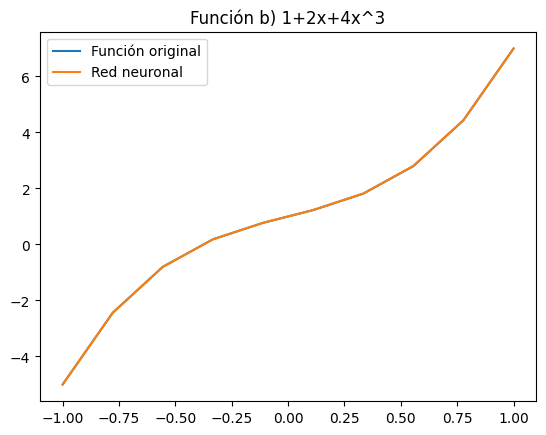

In [100]:
# Graficar función original y solución de la red
plt.plot(x_test_b, y_test_b, label='Función original')
plt.plot(x_test_b, model_b.predict(x_test), label='Red neuronal')
plt.legend()
plt.title('Función b) 1+2x+4x^3')
plt.show()